In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
training_data = pd.read_pickle('training_data.pkl')
training_data = training_data.fillna(value=0)
testing_data = pd.read_pickle('testing_data.pkl')
testing_data = testing_data.fillna(value=0)

training_data = training_data[['name','author','VB','NN','PRP','RB','WRB','UH','JJ','IN','CC','TTR','FSER',
          'sentiment','quotes','charno','genre']]
testing_data = testing_data[['name','author','VB','NN','PRP','RB','WRB','UH','JJ','IN','CC','TTR','FSER',
          'sentiment','quotes','charno','genre']]

In [3]:
X_train = training_data.iloc[:, 2:-1]
y_train = training_data.iloc[:, -1]
print(X_train.shape, y_train.shape)
print(np.unique(y_train, return_counts=True))

(725, 14) (725,)
(array(['Allegories', 'Christmas Stories', 'Detective and Mystery',
       'Ghost and Horror', 'Humorous and Wit and Satire', 'Literary',
       'Love and Romance', 'Sea and Adventure', 'Western Stories'],
      dtype=object), array([ 10,  10,  78,  10,  10, 556,  13,  25,  13]))


In [4]:
X_test = testing_data.iloc[:, 2:-1]
y_test = testing_data.iloc[:, -1]
print(X_test.shape, y_test.shape)
print(np.unique(y_test, return_counts=True))

(299, 14) (299,)
(array(['Allegories', 'Christmas Stories', 'Detective and Mystery',
       'Ghost and Horror', 'Humorous and Wit and Satire', 'Literary',
       'Love and Romance', 'Sea and Adventure', 'Western Stories'],
      dtype=object), array([  1,   2,  33,   2,   2, 238,   5,  11,   5]))


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_test.shape)
t = X_test[4].reshape(1, -1)

(299, 14)


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7688772007170922
0.7794375716898416
0.7926421404682275


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7822248144665476
0.7208092500574814
0.68561872909699


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7567478335036865
0.7389370405716453
0.7290969899665551


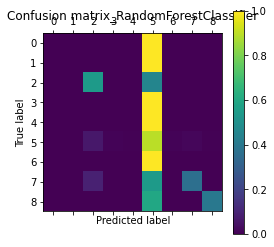

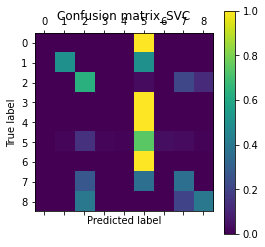

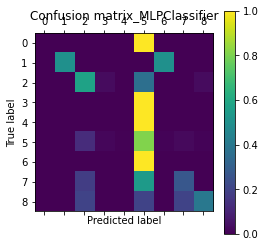

In [10]:
X_resampled, y_resampled = SMOTETomek(random_state=0).fit_resample(X_train, y_train)
# print(np.unique(y_resampled, return_counts=True))
classifiers = [RandomForestClassifier(n_estimators=100), SVC(), MLPClassifier()]
d = {}

for classifier in classifiers:
    classifier.fit(X_resampled, y_resampled)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=['Allegories', 'Christmas Stories', 'Detective and Mystery',
       'Ghost and Horror', 'Humorous and Wit and Satire', 'Literary',
       'Love and Romance', 'Sea and Adventure', 'Western Stories'])
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#     print(cm)
    print(precision_score(y_test, y_pred, average='weighted'))
    print(f1_score(y_test, y_pred, average='weighted'))
    print(recall_score(y_test, y_pred, average='weighted'))
    d[str(classifier).split('(')[0]] = [precision_score(y_test, y_pred, average='weighted'),
                                       recall_score(y_test, y_pred, average='weighted'),
                                       f1_score(y_test, y_pred, average='weighted')]
    plt.matshow(cm)
    plt.title('Confusion matrix_{}'.format(str(classifier).split('(')[0]))
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('{}_Features_reduced.png'.format(str(classifier).split('(')[0]), bbox_inches='tight',dpi=199)

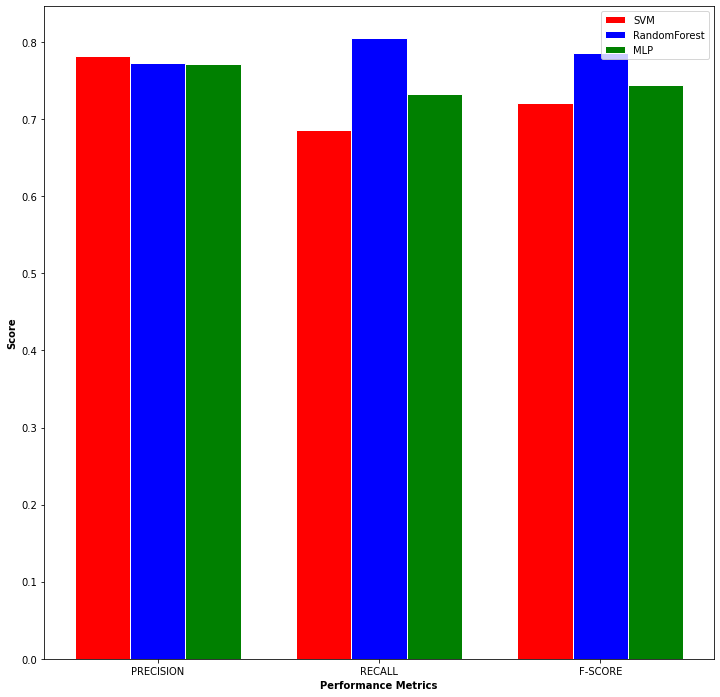

In [8]:
# set width of bar
barWidth = 0.25
 
# set height of bar
SVM = d['SVC']
RandomForest = d['RandomForestClassifier']
MLP = d['MLPClassifier']
# BoW = d['BoW']
 
# Set position of bar on X axis
r1 = np.arange(len(SVM))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# r4 = [x + barWidth for x in r3]
 
# Make the plot
f, (ax1) = plt.subplots(1, 1, figsize=(12, 12))
plt.bar(r1, SVM, color='red', width=barWidth, edgecolor='white', label='SVM')
plt.bar(r2, RandomForest, color='blue', width=barWidth, edgecolor='white', label='RandomForest')
plt.bar(r3, MLP, color='green', width=barWidth, edgecolor='white', label='MLP')
# plt.bar(r4, BoW, color='cyan', width=barWidth, edgecolor='white', label='BoW')
 
# Add xticks on the middle of the group bars
plt.xlabel('Performance Metrics', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(SVM))], ['PRECISION','RECALL','F-SCORE'])
 
# Create legend & Show graphic
plt.legend()
plt.savefig('Features_Comparison_Reduced.png', bbox_inches='tight',dpi=199)